In [4]:
import numpy as np
import pandas as pd
import nltk

In [5]:
pos_df = pd.read_csv('pos.txt', sep='\n', encoding='latin1', header=None)

In [6]:
pos_df.head()

,0
0,the rock is destined to be the 21st century's ...
1,"the gorgeously elaborate continuation of "" the..."
2,effective but too-tepid biopic
3,if you sometimes like to go to the movies to h...
4,"emerges as something rare , an issue movie tha..."


In [7]:
pos_df['mood'] = 1

In [8]:
pos_df.rename(columns={0: 'review'}, inplace=True)

In [9]:
pos_df.head()

,review,mood
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1


In [10]:
neg_df = pd.read_csv('negative.txt', sep='\n', encoding='latin1', header=None)

In [11]:
neg_df['mood'] = 0

In [12]:
neg_df.rename(columns={0: 'review'}, inplace=True)

In [13]:
neg_df.head()

,review,mood
0,"simplistic , silly and tedious.",0
1,"it's so laddish and juvenile , only teenage bo...",0
2,exploitative and largely devoid of the depth o...,0
3,[garbus] discards the potential for pathologic...,0
4,a visually flashy but narratively opaque and e...,0


In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
import string
import re
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [19]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()

In [20]:
pos_df['review'] = pos_df['review'].apply(lambda x: x.lower())
pos_df['review'] = pos_df['review'].apply(lambda x: " ".join([lemma.lemmatize(word, pos='v') for word in x.split()]))
pos_df['review'] = pos_df['review'].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords]))
pos_df['review'] = pos_df['review'].apply(lambda x: " ".join([word for word in x.split() if word not in punct]))
pos_df['review'] = pos_df['review'].apply(lambda x: " ".join([re.sub(r'[0-9\.]+', '', word) for word in x.split()]))

In [21]:
pos_df

,review,mood
0,rock destine st century's new conan he's go ma...,1
1,gorgeously elaborate continuation lord ring tr...,1
2,effective too-tepid biopic,1
3,sometimes like go movies fun wasabi good place...,1
4,emerge something rare issue movie that's hones...,1
...,...,...
5326,exuberantly romantic serenely melancholy time ...,1
5327,mazel tov film family's joyous life act yiddis...,1
5328,stand shadow motown best kind documentary one ...,1
5329,nice see piscopo years chaykin headly priceless,1


In [22]:
neg_df['review'] = neg_df['review'].apply(lambda x: x.lower())
neg_df['review'] = neg_df['review'].apply(lambda x: " ".join([lemma.lemmatize(word, pos='v') for word in x.split()]))
neg_df['review'] = neg_df['review'].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords]))
neg_df['review'] = neg_df['review'].apply(lambda x: " ".join([word for word in x.split() if word not in punct]))
neg_df['review'] = neg_df['review'].apply(lambda x: " ".join([re.sub(r'[0-9\.]+', '', word) for word in x.split()]))

In [23]:
neg_df

,review,mood
0,simplistic silly tedious,0
1,laddish juvenile teenage boys could possibly f...,0
2,exploitative largely devoid depth sophisticati...,0
3,[garbus] discard potential pathological study ...,0
4,visually flashy narratively opaque emotionally...,0
...,...,...
5326,terrible movie people nevertheless find move,0
5327,many definitions 'time waster' movie must sure...,0
5328,stand crocodile hunter hurry badly cobble look...,0
5329,thing look like made-for-home-video quickie,0


In [24]:
df = pd.concat([pos_df, neg_df], axis=0,).reset_index(drop=True)

In [25]:
df.head()

,review,mood
0,rock destine st century's new conan he's go ma...,1
1,gorgeously elaborate continuation lord ring tr...,1
2,effective too-tepid biopic,1
3,sometimes like go movies fun wasabi good place...,1
4,emerge something rare issue movie that's hones...,1


In [26]:
X = df['review']
y = df['mood']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorizer = TfidfVectorizer()

In [31]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [32]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [33]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_tfidf, y_train)

SVC()

In [34]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [35]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1323
           1       0.76      0.77      0.77      1343

    accuracy                           0.76      2666
   macro avg       0.76      0.76      0.76      2666
weighted avg       0.76      0.76      0.76      2666



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


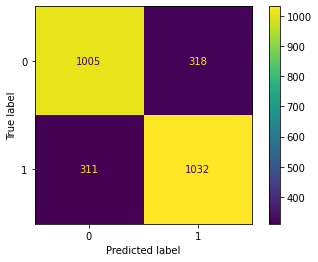

In [36]:
report(nb)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1323
           1       0.77      0.74      0.75      1343

    accuracy                           0.76      2666
   macro avg       0.76      0.76      0.76      2666
weighted avg       0.76      0.76      0.76      2666



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


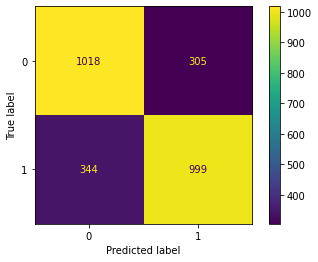

In [37]:
report(svc)

In [40]:
import joblib
joblib.dump(vectorizer, 'tfidf.pkl')
joblib.dump(svc, 'model.pkl')

['model.pkl']

In [49]:
model = joblib.load('model.pkl')
tfidf = joblib.load('tfidf.pkl')

In [84]:
data = ['worst movie could have taken nicely']
def text_processing(data):
  for sent in data:
    final_words = []
    text = sent.lower().split()
    for word in text:
      if word not in stopwords and word not in punct:
        lemmatized_text = re.sub(r'[0-9\.]+', '' ,lemma.lemmatize(word, pos='v'))
        final_words.append(lemmatized_text)
  return ' '.join(final_words)

In [85]:
final_review = text_processing(data)

In [86]:
review = pd.Series(final_review)

In [87]:
vector = tfidf.transform(review)

In [88]:
result = model.predict(vector)[0]

In [89]:
if result == 1:
  print('positive review')
else:
  print('negative review')

negative review


In [90]:
tfidf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaa',
 'aaliyah',
 'abagnale',
 'abandon',
 'abandone',
 'abandono',
 'abbass',
 'abbott',
 'abbreviate',
 'abc',
 'abderrahmane',
 'aberration',
 'abhor',
 'abhorrent',
 'abide',
 'abilities',
 'ability',
 'abject',
 'able',
 'ably',
 'abomination',
 'aborbing',
 'aboriginal',
 'aboul',
 'abound',
 'about',
 'above',
 'abrahams',
 'abrams',
 'abridge',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absolutamente',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorption',
 'abstract',
 'absurd',
 'absurdist',
 'absurdities',
 'absurdity',
 'absurdly',
 'abundance',
 'abundant',
 'abundantly',
 'aburrido',
 'abuse',
 'aby',
 'abysmal',
 'abysmally',
 'acaba',
 'acabamos',
 'academic',
 'academy',
 'accelerate',
 'accent',
 'accentuate',
 'accept',
 'acceptable',
 'acceptance',
 'access',
 'accessibility',
 'accessible',
 'accident',
 'accidental',
 'acclaim',
 'accomodates',
 'accompany',
 'accomplish',
 'accomplishment',
 'accomplishments',
 'accord',
 'accordio